In [84]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [85]:
path="Cust_Segmentation.csv"
df=pd.read_csv(path)

In [86]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [87]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [89]:
df.shape

(850, 10)

In [90]:
df=df.drop('Address',axis=1)

In [91]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [92]:
import numpy as np
df.replace("?",np.nan,inplace=True)


In [93]:
avg_Defaulted=df["Defaulted"].mean()
df["Defaulted"].replace(np.nan,avg_Defaulted,inplace=True)

In [94]:
df.shape

(850, 9)

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
df[0:1]

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3


In [97]:
X=df[["Customer Id","Age","Edu","Years Employed","Income","Card Debt","Other Debt","Defaulted","DebtIncomeRatio"]]

In [98]:
#X=df.values[:,1:]
X=np.asarray(X)



In [99]:
X

array([[1.000e+00, 4.100e+01, 2.000e+00, ..., 1.073e+00, 0.000e+00,
        6.300e+00],
       [2.000e+00, 4.700e+01, 1.000e+00, ..., 8.218e+00, 0.000e+00,
        1.280e+01],
       [3.000e+00, 3.300e+01, 2.000e+00, ..., 5.802e+00, 1.000e+00,
        2.090e+01],
       ...,
       [8.480e+02, 2.500e+01, 4.000e+00, ..., 3.210e+00, 1.000e+00,
        3.340e+01],
       [8.490e+02, 3.200e+01, 1.000e+00, ..., 6.960e-01, 0.000e+00,
        2.900e+00],
       [8.500e+02, 5.200e+01, 1.000e+00, ..., 3.638e+00, 0.000e+00,
        8.600e+00]])

In [100]:
#X2=np.nan_to_num(X)

In [101]:
# Scalling Operatio Z Score

In [102]:
#X3=sklearn.preprocessing.StandardScaler().fit_transform(X)

In [103]:
X3=sklearn.preprocessing.MinMaxScaler().fit_transform(X)

In [104]:
X3

array([[0.        , 0.58333333, 0.25      , ..., 0.02921681, 0.        ,
        0.15048544],
       [0.00117786, 0.75      , 0.        , ..., 0.23248272, 0.        ,
        0.30825243],
       [0.00235571, 0.36111111, 0.25      , ..., 0.16375068, 1.        ,
        0.50485437],
       ...,
       [0.99764429, 0.13888889, 0.75      , ..., 0.09001166, 1.        ,
        0.80825243],
       [0.99882214, 0.33333333, 0.        , ..., 0.01849165, 0.        ,
        0.06796117],
       [1.        , 0.88888889, 0.        , ..., 0.1021877 , 0.        ,
        0.20631068]])

In [105]:
from sklearn.cluster import KMeans

In [106]:
clf=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)

In [107]:
clf.fit(X3)

KMeans(n_clusters=3)

In [108]:
clf.labels_

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,

In [109]:
df["Final"]=clf.labels_

In [110]:
df[0:10]

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Final
0,1,41,2,6,19,0.124,1.073,0.000000,6.3,0
1,2,47,1,26,100,4.582,8.218,0.000000,12.8,0
2,3,33,2,10,57,6.111,5.802,1.000000,20.9,2
3,4,29,2,4,19,0.681,0.516,0.000000,6.3,0
4,5,47,1,31,253,9.308,8.908,0.000000,7.2,0
5,6,40,1,23,81,0.998,7.831,0.261429,10.9,0
6,7,38,2,4,56,0.442,0.454,0.000000,1.6,0
7,8,42,3,0,64,0.279,3.945,0.000000,6.6,0
8,9,26,1,5,18,0.575,2.215,0.261429,15.5,0
9,10,47,3,23,115,0.653,3.947,0.000000,4.0,0


In [111]:
df.groupby('Final').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Final,,,,,,,,,
0,211.103245,35.050147,1.681416,9.598820,47.380531,1.302917,2.713381,0.062465,8.733038
1,645.286585,36.134146,1.634146,9.362805,48.993902,1.387323,3.018982,0.054996,9.116463
2,428.726776,33.010929,1.901639,5.224044,41.213115,2.423858,3.862814,1.000000,14.727869


### Elbow Method to find K

C:\Users\20356119\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


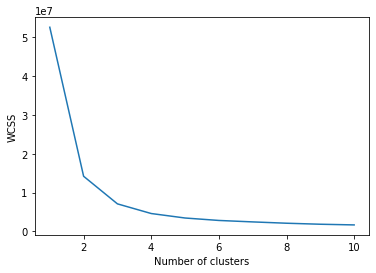

In [112]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [113]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_mean = kmeans.fit_predict(X)

In [114]:
y_mean

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [115]:
# Get the centroids
centroids = kmeans.cluster_centers_

In [116]:
print(centroids)

[[4.23000000e+02 3.57067138e+01 1.64664311e+00 8.82685512e+00
  4.81024735e+01 1.66513074e+00 3.29802120e+00 2.87995962e-01
  1.06250883e+01]
 [7.07500000e+02 3.46643357e+01 1.70279720e+00 8.12587413e+00
  4.52937063e+01 1.52956643e+00 3.03435664e+00 2.45759241e-01
  1.00961538e+01]
 [1.41000000e+02 3.47188612e+01 1.78291815e+00 8.75088968e+00
  4.66441281e+01 1.53597509e+00 2.90317082e+00 2.50620234e-01
  9.79181495e+00]]


In [117]:
centroids.shape

(3, 9)

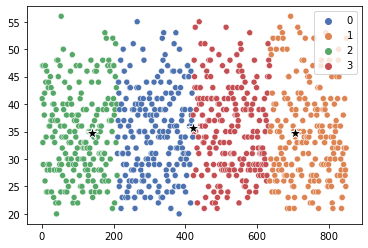

In [144]:
import seaborn as sns
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, palette='deep')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='*',s=160)
plt.show()

In [118]:
from sklearn.metrics import silhouette_samples , silhouette_score

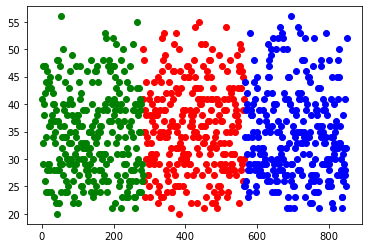

In [119]:
plt.scatter(X[y_mean == 0,0],X[y_mean ==0,1], color='red')
plt.scatter(X[y_mean ==1,0], X[y_mean==1,1], color= 'blue')
plt.scatter(X[y_mean ==2,0], X[y_mean==2,1], color= 'green')
plt.scatter(X[y_mean ==3,0], X[y_mean==3,1], color= 'yellow')
plt.show()

### Calculating the silhouette score

In [120]:
print(f'Silhouette Score(n=4): {silhouette_score(X, y_mean)}')

Silhouette Score(n=4): 0.5426600472171585


### K=4 

In [121]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_mean = kmeans.fit_predict(X)

In [122]:
y_mean

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [123]:
print(f'Silhouette Score(n=4): {silhouette_score(X, y_mean)}')

Silhouette Score(n=4): 0.5017248507340742


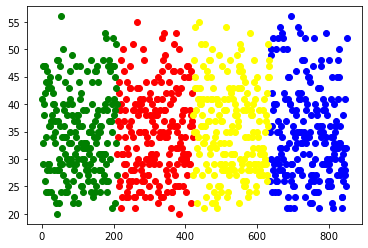

In [124]:
plt.scatter(X[y_mean == 0,0],X[y_mean ==0,1], color='red')
plt.scatter(X[y_mean ==1,0], X[y_mean==1,1], color= 'blue')
plt.scatter(X[y_mean ==2,0], X[y_mean==2,1], color= 'green')
plt.scatter(X[y_mean ==3,0], X[y_mean==3,1], color= 'yellow')
plt.show()